Import libraries

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau


Load data

In [2]:
path = "../12CPU_30RAM/3600s/allGroup/merged.csv"
df = pd.read_csv(path).dropna(inplace=False)

#timestamp remove
#df = df.iloc[:,1:]

if not "merge" in path:
    df = df.iloc[:,1:]
else:
    df = df.iloc[:,2:]

#methods.csv
if "methods" in path:
    endpoint_map = {
        'do-register': 0,
        'add-sell-offer': 1,
        'add-buy-offer': 2,
        'get-stock-data': 3,
        'add-company': 4,
        'get-stock-users-and-companies': 5

    }
    # zastosowanie mapowania na kolumnę endpointUrl
    df['endpointUrl'] = df['endpointUrl'].replace(endpoint_map)

#
if 'replicaId' in df.columns:
    df['replicaId'] = pd.factorize(df['replicaId'])[0]


# zaokrąglij dane procentowe zużycia do dwóch miejsc po przecinku
cols_to_round = [col for col in df.columns if 'memoryUsage' in col or 'cpuUsage' in col]
if cols_to_round:
    df[cols_to_round] = df[cols_to_round].round(2)




In [3]:
df = df.drop(["queueSizeForward"], axis=1);

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589190 entries, 0 to 8589189
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   applicationTime          int64  
 1   databaseTime             int64  
 2   endpointUrl              int64  
 3   queueSizeBack            int64  
 4   st_cpuUsage              float64
 5   st_memoryUsage           float64
 6   trad_applicationTime     int64  
 7   trad_databaseTime        int64  
 8   trad_numberOfSellOffers  int64  
 9   trad_numberOfBuyOffers   int64  
 10  traf_cpuUsage            float64
 11  traf_memoryUsage         float64
dtypes: float64(4), int64(8)
memory usage: 786.4 MB


Pearson correlation coefficient

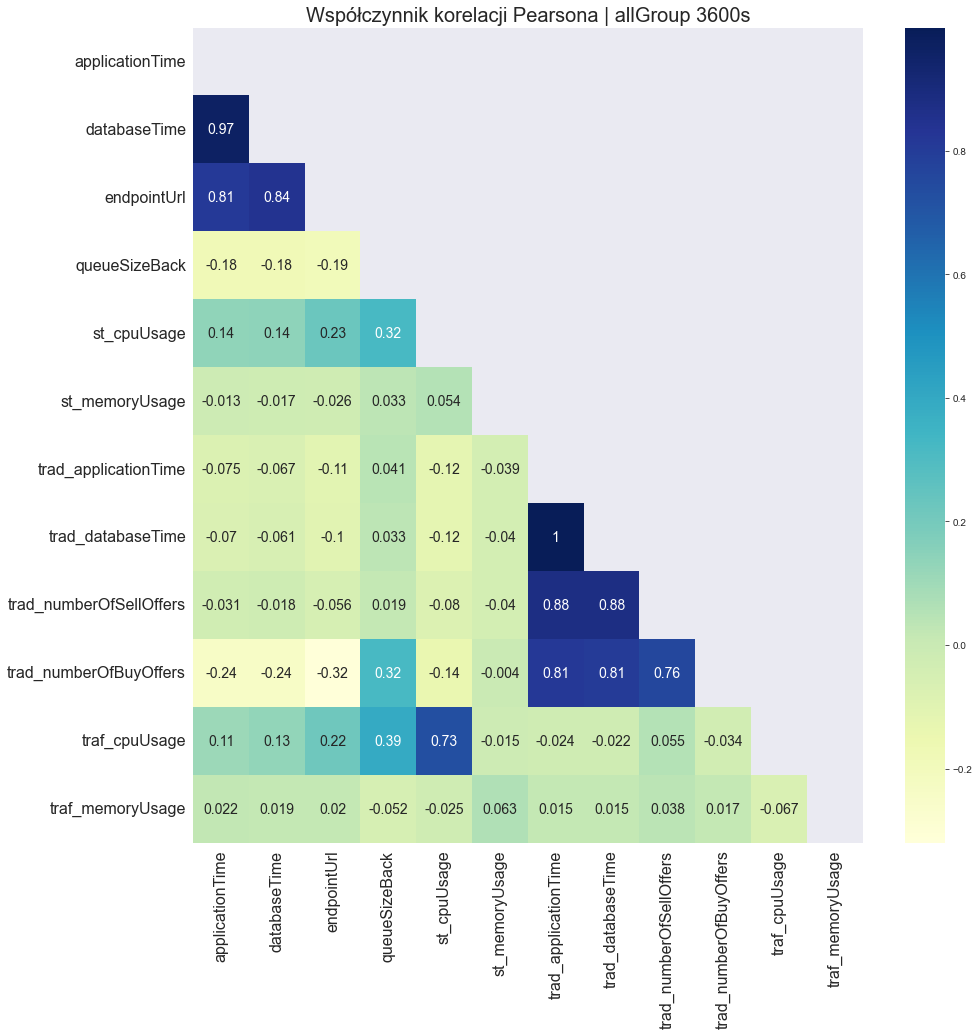

In [4]:
plt.figure(figsize=(15, 15))
plt.title("Współczynnik korelacji Pearsona | allGroup 3600s", fontsize=20)

mask = np.triu(np.ones_like(df.corr()))
heatmap = sb.heatmap(df.corr(method="pearson"), annot=True, mask=mask, cmap='YlGnBu')

# Zmiana wielkości etykiet osi X i Y
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

# Zmiana wielkości wartości w heatmapie
for text in heatmap.texts:
    text.set_fontsize(14)

plt.show()

Spearman correlation coefficient

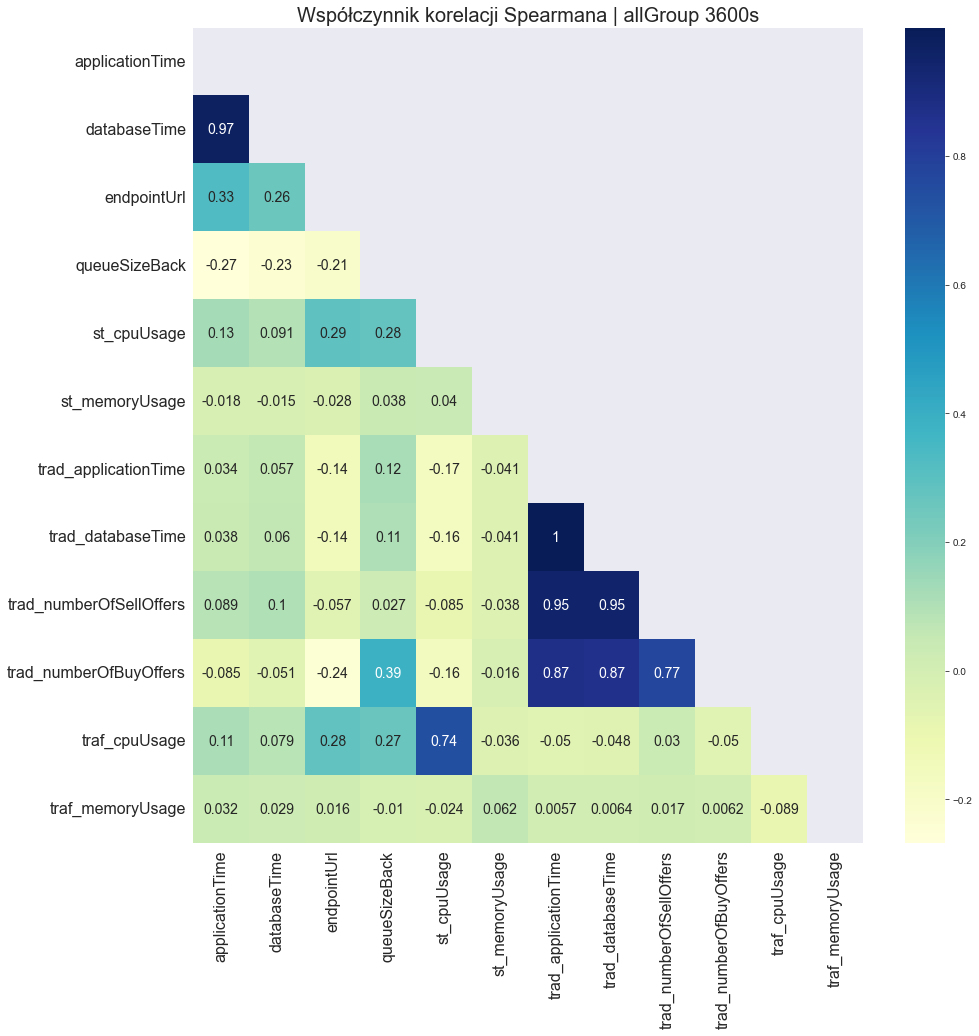

In [5]:
plt.figure(figsize=(15, 15))
plt.title("Współczynnik korelacji Spearmana | allGroup 3600s", fontsize=20)

mask = np.triu(np.ones_like(df.corr()))
heatmap = sb.heatmap(df.corr(method="spearman"), annot=True, mask=mask, cmap='YlGnBu')

# Zmiana wielkości etykiet osi X i Y
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

# Zmiana wielkości wartości w heatmapie
for text in heatmap.texts:
    text.set_fontsize(14)

plt.show()

Kendall's Tau

C:\Users\kalon\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


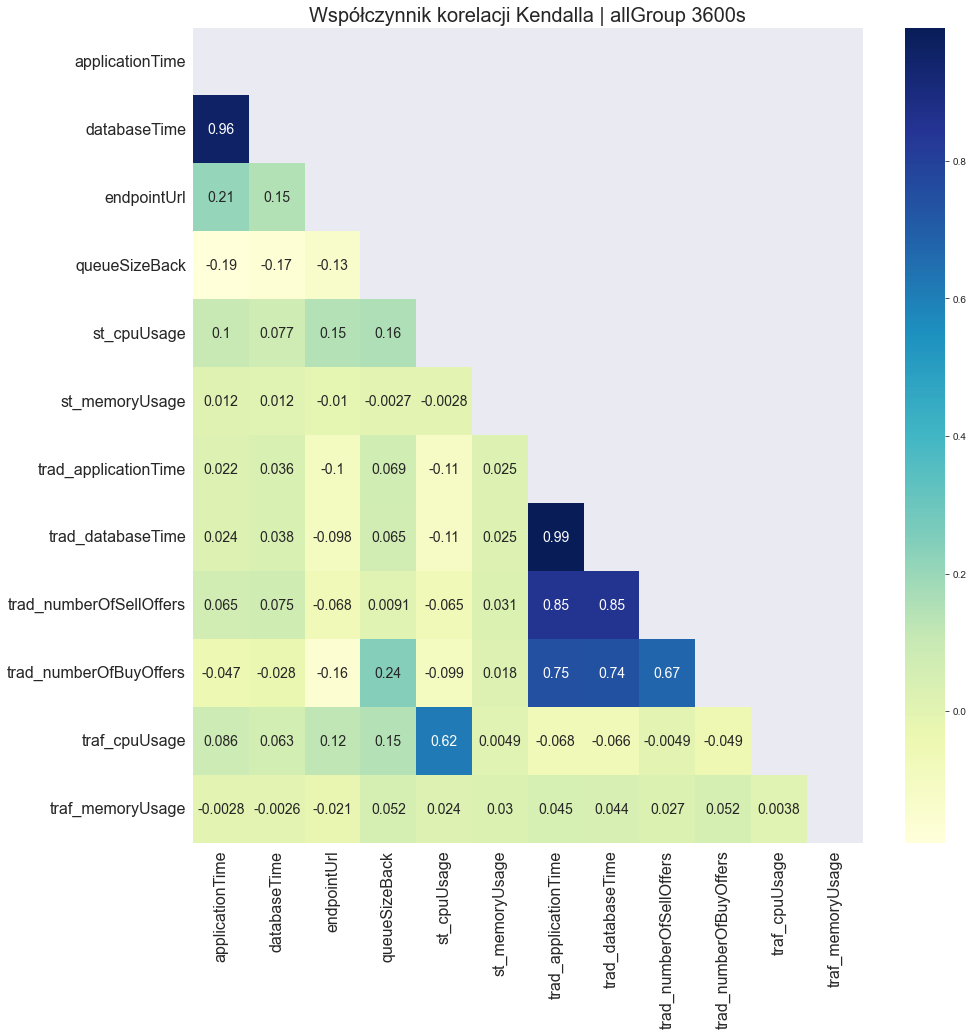

In [29]:
plt.figure(figsize=(15, 15))
plt.title("Współczynnik korelacji Kendalla | allGroup 3600s", fontsize=20)

mask = np.triu(np.ones_like(df.corr()))
heatmap = sb.heatmap(df.corr(method="kendall"), annot=True, mask=mask, cmap='YlGnBu')

# Zmiana wielkości etykiet osi X i Y
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

# Zmiana wielkości wartości w heatmapie
for text in heatmap.texts:
    text.set_fontsize(14)

plt.show()

Plot wybranych cech

Text(0.5, 1.0, 'Cpu Usage vs queueSizeBack')

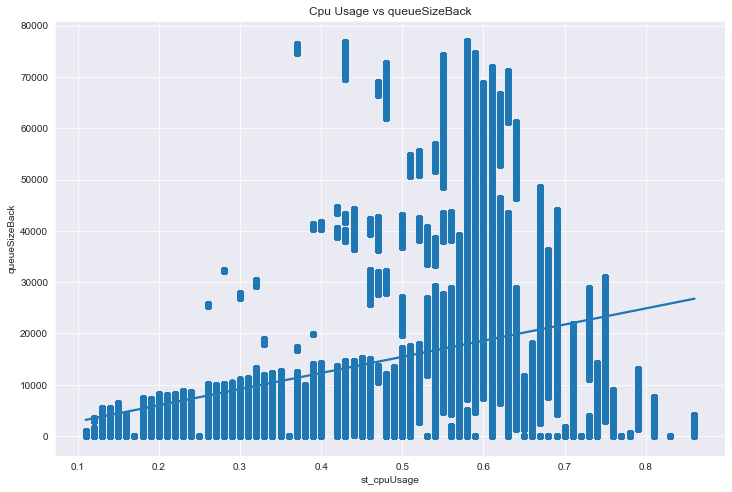

In [30]:

plt.figure(figsize=(12,8))
sb.regplot(x='st_cpuUsage', y='queueSizeBack', data=df)
plt.title('Cpu Usage vs queueSizeBack')